<font color = ' #cc6600' size = '5'>**Machine Learning**</font>

> machine learninge algorithms enables computers to learn from data and even improve themselves without being explicitely programmed.

>
>Machine Learning is a step into the direction of artificial intelligence (AI).
>
>Machine Learning is a program that analyses data and learns to predict the outcome.
>
>Here, We will learn how to use various Python modules to get the answers we need.
And we will learn how to make functions that are able to predict the outcome based on what we have learned.

<font color = '#0077b3' size = '4'>**Data Set**</font>

>In the mind of a computer, a data set is any collection of data. It can be anything from an array to a complete database.

>In Machine Learning it is common to work with very large data sets. In this tutorial we will try to make it as easy as possible to understand the different concepts of machine learning, and we will work with small easy-to-understand data sets.


<font color = '#0077b3' size = '4'>**Data Types**</font>

To analyze data, it is important to know what type of data we are dealing with.<br>
There are three main categories:

>- __Numerical:__ Numerical data are numbers, and can be split into two numerical categories:
>>__Discrete Data:__ numbers that are limited to integers. E.g: The number of cars passing by.
>>
>>__Continuous Data:__ numbers that are of infinite value. E.g: The price of an item.
>
>- __Categorical:__ data are values that cannot be measured up against each other. E.g: a color value, or any yes/no values.
>
>- __Ordinal:__ data are like categorical data, but can be measured up against each other. E.g: school grades where A is better than B and so on.

<font color = '#0077b3'  size = '4'>**Machine Learning - Mean Median Mode**</font>

In Machine Learning (and in mathematics) there are often three values that interests us:

>__Mean__ - The average value, use `mean()` in numpy.
>
>__Median__ - The mid point value(after sort), use `median()` in numpy.
>
>__Mode__- The most common value, use `mode()` in scipy.

<font color = '#0077b3'  size = '4'>**Machine Learning - Standard Deviation & Variance**</font>

> __Standard deviation__  **σ**
>
>Standard deviation is a number that describes how spread out the values are, use `std()` in numpy.
>
>A low standard deviation means that most of the numbers are close to the mean (average) value.
>
>A high standard deviation means that the values are spread out over a wider range.

>__Variance__ **σ^2**
>
> Variance is another number that indicates how spread out the values are.
>
>In fact, if you take the square root of the variance, you get the standard deviation


<font color = 'darkred' size = '5' >**0_100 a project in machine learning**</font>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

# خواندن و ذخیره دیتاست #reading dataset
df = pd.read_csv(url)
df.to_csv("california_housing.csv", index=False)

print("دانلود و ذخیره شد: california_housing.csv")


دانلود و ذخیره شد: california_housing.csv


In [3]:
import pandas as pd

df = pd.read_csv("california_housing.csv")
print(df.info())
print('---------------------')
print(df.ocean_proximity.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
---------------------
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

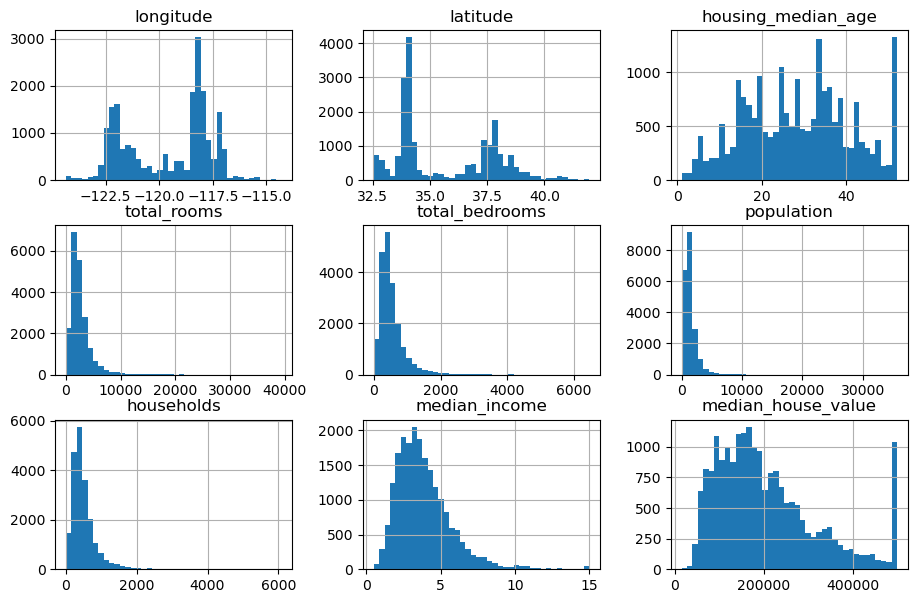

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins = 40, figsize = (11,7))

<font color = '#0077b3'  size = '4'>**Train and Test**</font>

>__1.Random Split__



In [9]:
def shuffle_and_split(df, test_ratio):
    radnom_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) *test_ratio) 
    test_random_indices = radnom_indices [:test_set_size]
    train_random_indices= radnom_indices [test_set_size:]
    return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [10]:
shuffle_and_split(df, 0.2)[0]   # #20 % of data set for test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12898,-121.34,38.64,17.0,2761.0,501.0,1128.0,482.0,3.7562,139700.0,INLAND
20226,-119.30,34.29,26.0,3665.0,932.0,2775.0,870.0,1.9286,160500.0,NEAR OCEAN
19528,-120.97,37.64,42.0,2359.0,504.0,1131.0,480.0,2.0833,95500.0,INLAND
6843,-118.13,34.07,20.0,2130.0,654.0,1870.0,578.0,2.3664,192200.0,<1H OCEAN
18419,-121.82,37.26,10.0,3030.0,574.0,1623.0,589.0,5.1356,218700.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
7800,-118.09,33.90,37.0,1147.0,258.0,742.0,242.0,4.0461,153500.0,<1H OCEAN
5911,-118.43,34.28,27.0,862.0,280.0,1243.0,267.0,2.3724,154200.0,<1H OCEAN
15217,-117.12,32.95,8.0,3670.0,536.0,1723.0,592.0,6.3542,218100.0,<1H OCEAN
5825,-118.30,34.19,14.0,3615.0,913.0,1924.0,852.0,3.5083,280900.0,<1H OCEAN


>__2. identifier hash__

In [12]:
from zlib import crc32 #it gives your data a spcific identiefier (32 bit number)

In [13]:
def is_identifier_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio*2**32

In [14]:
def split_train_test_with_identifier_hash(df, test_ratio,identifier_column):
    identifiers = df[identifier_column]
    in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
    return df.loc[~in_test_set], df.loc[in_test_set]

In [15]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, 'index') #df, test_ratio 20%,  identifier column 

In [16]:
test_set
#train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [17]:
df_with_identifier = df
df_with_identifier['identifier'] = df['longitude']*1000 + df['latitude']  #change my identifier

train_set, test_set = split_train_test_with_identifier_hash(df_with_identifier, 0.2, 'identifier') #df, test_ratio 20%,  identifier column 
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


<font color = '#0077b3'  size = '4'>**Using scikit learn library**</font>

>only with one line code with scikit learn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 40)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN,-118105.82
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN,-121932.46
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN,-123800.17
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN,-121783.14
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN,-118295.95
...,...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN,-122831.57
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN,-117216.80
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN,-118395.77
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN,-118325.77


<font color = '#0077b3'  size = '4'>**Stratified Sampling (continues feature)**</font>

In [30]:
import pandas as pd
#median income as a continues feature to categorize 

df ['median_income_categories'] = pd.cut(df['median_income'], bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])

<Axes: xlabel='median_income_categories'>

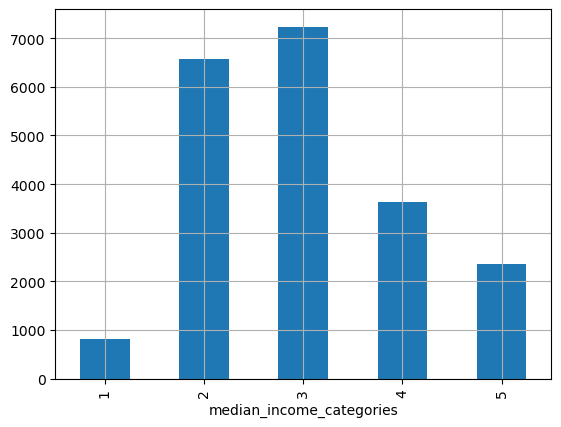

In [32]:
df['median_income_categories'].value_counts().sort_index().plot.bar(grid = True)

<font color = 'darkred' size = '4'>**stratified split with scikit learn**</font>

In [43]:
from sklearn.model_selection import train_test_split

# df =  مجموعه داده‌ی اصلی, test_size = 20٪ داده‌ها به تست اختصاص داده می‌شوند, stratify = استراتیفیکیشن بر اساس این ستون,
#random state = برای تولید نتایج قابل تکرار seed

stratified_train_set, stratified_test_set = train_test_split(df, test_size = 0.2, stratify= df["median_income_categories"], random_state =40)


In [45]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,3
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,3
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,2
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,2
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,2
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,4
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,3


In [47]:
print(df["median_income_categories"].value_counts(normalize=True))   # توزیع کل داده‌ها
print(stratified_train_set["median_income_categories"].value_counts(normalize=True))  # توزیع در train
print(stratified_test_set["median_income_categories"].value_counts(normalize=True))   # توزیع در test
#sampling bias is about 0
#مقدارنسبی هر کلاس در ترین و تست باید تقریبا برابر با توزیع اصلی باشد 

median_income_categories
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64
median_income_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: proportion, dtype: float64
median_income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64


In [49]:
#after your sampling you must delete the category column its unuseful for your model

stratified_train_set = stratified_train_set.drop("median_income_categories", axis = 1)
                                        
stratified_test_set = stratified_test_set.drop("median_income_categories", axis = 1)


In [51]:
stratified_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93
...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10


<font color = '#0077b3'  size = '5'>**Visualization**</font>

>__Seaborn__

In [54]:
train = stratified_train_set #after spliting data we used new train data and named it 'train'

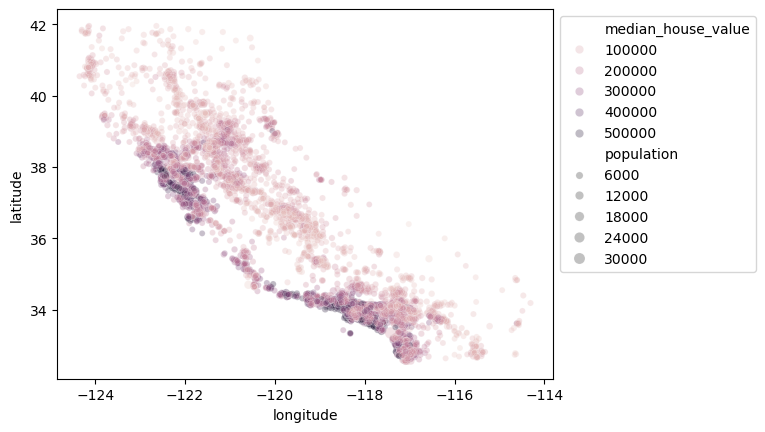

In [56]:
import seaborn as sns

ax = sns.scatterplot(data= train, 
                x = 'longitude', y = 'latitude',
                size = 'population', alpha = 0.3, hue= 'median_house_value')

sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

<font color = '#0077b3'  size = '5'>**Correlations**</font>

In [59]:
#removing string (categorcal) column from datafram because correlation cant handle it 

stratified_train_set = stratified_train_set.drop(columns = ["ocean_proximity"])                                  
stratified_test_set = stratified_test_set.drop(columns = ["ocean_proximity"])
train2= stratified_train_set

In [61]:
train2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,identifier
longitude,1.000000,-0.925744,-0.103618,0.041015,0.066820,0.096875,0.052258,-0.020808,-0.051167,1.000000
latitude,-0.925744,1.000000,0.006480,-0.032324,-0.064705,-0.106290,-0.068554,-0.072867,-0.137691,-0.925591
housing_median_age,-0.103618,0.006480,1.000000,-0.361585,-0.320116,-0.291642,-0.302235,-0.122442,0.105329,-0.103713
total_rooms,0.041015,-0.032324,-0.361585,1.000000,0.929260,0.854717,0.917051,0.200334,0.138007,0.041021
total_bedrooms,0.066820,-0.064705,-0.320116,0.929260,1.000000,0.875837,0.979742,-0.008368,0.052814,0.066817
population,0.096875,-0.106290,-0.291642,0.854717,0.875837,1.000000,0.905437,0.005458,-0.021544,0.096858
households,0.052258,-0.068554,-0.302235,0.917051,0.979742,0.905437,1.000000,0.013639,0.070014,0.052236
median_income,-0.020808,-0.072867,-0.122442,0.200334,-0.008368,0.005458,0.013639,1.000000,0.686865,-0.020906
median_house_value,-0.051167,-0.137691,0.105329,0.138007,0.052814,-0.021544,0.070014,0.686865,1.000000,-0.051364
identifier,1.000000,-0.925591,-0.103713,0.041021,0.066817,0.096858,0.052236,-0.020906,-0.051364,1.000000


In [63]:
train2.corr()['median_house_value'] #corelation of each feature with target column 'median_house_value' 

# median_income has r = 0.686865 with median_house_value

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

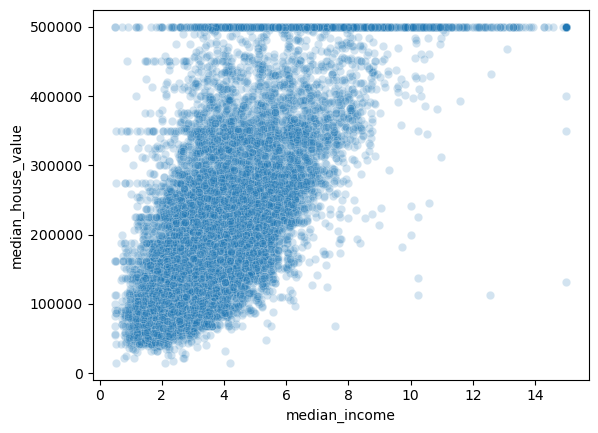

In [65]:
sns.scatterplot(data = train,
                x = 'median_income', y = 'median_house_value',
                alpha = 0.2)

<font color = '#0077b3'  size = '4'>**Attribute combinations**</font>

In [68]:
train2["rooms_per_house"] = train["total_rooms"] / train["households"] #creating new feature rooms in each house 
train2["bedrooms_ratio"] = train["total_bedrooms"] / train["total_rooms"]
train2["people_per_house"] = train ["population"] / train ["households"]

train2


train["rooms_per_house"] = train["total_rooms"] / train["households"] #creating new feature rooms in each house 
train["bedrooms_ratio"] = train["total_bedrooms"] / train["total_rooms"]
train["people_per_house"] = train ["population"] / train ["households"]

In [70]:
train2.corr()['median_house_value'] #after combiations correlation r became bigger with target

longitude            -0.051167
latitude             -0.137691
housing_median_age    0.105329
total_rooms           0.138007
total_bedrooms        0.052814
population           -0.021544
households            0.070014
median_income         0.686865
median_house_value    1.000000
identifier           -0.051364
rooms_per_house       0.159500
bedrooms_ratio       -0.255178
people_per_house     -0.027110
Name: median_house_value, dtype: float64

<font color ='#0077b3' size = '4.5'>**Prepare Data**</font><br>
>__1. Droping target feature from df__
>
>__2. Data Cleaning__

In [73]:
train #my target feature is in dataset  "median_house_value"


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02,5.722426,0.185031,3.209559


In [75]:
#جدا سازی ستون تارگت یا فیچر تارگت 
train_features = train.drop("median_house_value", axis = 1)
train_target = train["median_house_value"]
train_features
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

<font color = '#0077b3'  size = '3'>**Data cleaning**</font>

>__missing values :__ removing the column, removing the row, replacing it with specific number(mean, mode,median)

In [78]:
train_features.info() #check ur data for missing values  total_bedrooms, bedrooms_ratio has missing values 

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [80]:
#remove rows with NA values 

train_features2 = train_features.dropna(subset = ["total_bedrooms"])
train_features2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,INLAND,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,<1H OCEAN,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,<1H OCEAN,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,INLAND,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,INLAND,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,INLAND,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,<1H OCEAN,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,INLAND,-121292.02,5.722426,0.185031,3.209559


In [82]:
#replacing with median  #train_features_with_imputed_NA_values

total_bedrooms_median = train_features["total_bedrooms"].median()

train_features["total_bedrooms"] = train_features["total_bedrooms"].fillna(total_bedrooms_median)
train_features["bedrooms_ratio"] = train_features["total_bedrooms"] / train_features["total_rooms"]

train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [84]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16512 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


<font color = '#0077b3'  size = '3'>**Simple Imputer <br>solving data missing problem with scikit learn**</font>

In [87]:
from sklearn.impute import SimpleImputer as SI               

#with scikit learn, choose ur strategy = median, fit and then transform 

In [88]:
simple_imputer = SI(strategy= "median")                           

In [91]:
train_features_numeric = train_features.select_dtypes(include= [np.number])
train_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   identifier          16512 non-null  float64
 9   rooms_per_house     16512 non-null  float64
 10  bedrooms_ratio      16512 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [93]:
simple_imputer.fit(train_features_numeric) #fit ruye data 

SimpleImputer(strategy='median')

In [95]:
simple_imputer.transform(train_features_numeric)

array([[-121.26      ,   37.88      ,   42.        , ...,    5.        ,
           0.2       ,    2.75268817],
       [-121.64      ,   37.85      ,   22.        , ...,    6.246875  ,
           0.2076038 ,    3.021875  ],
       [-118.15      ,   33.95      ,   35.        , ...,    4.48371336,
           0.25499455,    2.59283388],
       ...,
       [-118.27      ,   34.17      ,   48.        , ...,    5.79925651,
           0.17948718,    3.0669145 ],
       [-121.33      ,   37.98      ,   36.        , ...,    5.72242647,
           0.18503052,    3.20955882],
       [-118.4       ,   34.        ,   37.        , ...,    5.92277992,
           0.16818774,    2.8996139 ]])

In [97]:
pd.DataFrame(simple_imputer.transform(train_features_numeric),
                     columns = train_features_numeric.columns,
             index = train_features_numeric.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,-121292.02,5.722426,0.185031,3.209559


<font color = '#0077b3'  size = '4'>**Dealing with categorical data**</font>
>
>__1: ordinalencoder__  a preprocessing technique used to convert categorical (text or non-numeric) data into numerical values by assigning a unique integer to each category. This is useful because most machine learning algorithms require numerical input.<br>
✅ Good for ordinal data (categories with a natural order, like "Cold" < "Warm" < "Hot").<br>
✅ Works well with tree-based models (e.g., Random Forest, XGBoost), since they split features based on values rather than distances.
>>__disadvantages:__<br>
>>❌If categories are `nominal` (no inherent order, e.g., "Red", "Green", "Blue"), assigning integers (0, 1, 2) may mislead the model into assuming an artificial ranking (Blue > Green > Red), which can hurt performance.
>
>__2: onehotencoder__  One-Hot Encoding creates binary (0/1) columns for each category, ensuring no artificial ordinal relationship is introduced.<br>
✅ No Implied Order → Good for nominal data (e.g., colors, countries, IDs).<br>
✅ Works Well with Linear Models (Logistic Regression, SVM) since distances between categories are equal.<br>
✅ Preserves All Information (unlike hashing or binning).
>>__Disadvantages:__<br>
❌ Curse of Dimensionality → If a feature has many categories (e.g., "ZIP Code"), increasing memory and computation.<br>
❌ Sparse Matrix → Most entries are 0, which can slow down training.<br>
❌ Not Ideal for Tree-Based Models (Random Forest, XGBoost) because splits on many binary columns may be inefficient.

In [100]:
train_features[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          7324
INLAND             5213
NEAR OCEAN         2126
NEAR BAY           1844
ISLAND                5
Name: count, dtype: int64

In [102]:
train_features_categorical = train_features[['ocean_proximity']]

In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [106]:
oe = OrdinalEncoder()
ocean_proximity_index = oe.fit_transform(train_features_categorical)
ocean_proximity_index

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [108]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(train_features_categorical)
ocean_proximity_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [114]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [116]:
train_features_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray(),columns=ohe.get_feature_names_out())

<font color = '#0077b3'  size = '4'>**Feature Scaling**</font><br>

__Feature scaling__ is a preprocessing techniques used to adjust the range or distribution of numerical features so that they are on a similar scale.<br>__Common Scaling & Normalization Techniques:__
> __1: Min-Max Scaling (Normalization):__ Rescales features to a fixed range (usually [0, 1]).
Formula:
$$ x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$
>> Best for:<br>
✅Neural networks (inputs should be in a small range, e.g., 0-1).<br>
✅Image data (pixel values typically between 0-255).<br>
❌Disadvantage: __Sensitive to outliers.__

>__2:Standardization (Z-Score Normalization):__ Transforms features to have a mean of 0 and standard deviation of 1.
Formula:
$$ z = \frac{x -\mu}{\sigma}$$
>>Best for:<br>
✅Algorithms assuming Gaussian distribution (e.g., PCA, SVM, Linear Regression).<br>
✅When outliers are present (robust to extreme values), and __features distributions is nomal or likely normal__

__some transformation before standardization/normalization:__
>__1.Log/Power Transformations:__ <br>
>>Used for skewed data (e.g., income, age).Common methods:__Log transform:__  $$ x′ = log(x) $$
>>Box-Cox transform: Adjusts data to be more Gaussian-like, lets do it for ['total rooms'] in this dataset


In [119]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
mms = MinMaxScaler(feature_range=(-1,1))
mms.fit_transform(train_features_numeric) #every values is between -1,1

array([[-0.38446215,  0.13496281,  0.60784314, ..., -0.93691343,
        -0.88348775, -0.99668387],
       [-0.46015936,  0.12858661, -0.17647059, ..., -0.91797651,
        -0.87804467, -0.99625062],
       [ 0.23505976, -0.70031881,  0.33333333, ..., -0.94475454,
        -0.84412062, -0.99694115],
       ...,
       [ 0.21115538, -0.65356004,  0.84313725, ..., -0.92477472,
        -0.89817158, -0.99617813],
       [-0.39840637,  0.15621679,  0.37254902, ..., -0.92594157,
        -0.89420346, -0.99594855],
       [ 0.18525896, -0.68969182,  0.41176471, ..., -0.9228987 ,
        -0.90626013, -0.9964474 ]])

In [123]:
from sklearn.preprocessing import StandardScaler

In [125]:
ss = StandardScaler()
ss.fit_transform(train_features_numeric)
#ss.fit_transform(train_features_numeric).min()

array([[-8.47903024e-01,  1.06069020e+00,  1.06500612e+00, ...,
        -1.79381511e-01, -2.10670105e-01, -2.84533255e-02],
       [-1.03770326e+00,  1.04660645e+00, -5.26863260e-01, ...,
         3.65121948e-01, -9.60951107e-02, -3.75641043e-03],
       [ 7.05462097e-01, -7.84281723e-01,  5.07851836e-01, ...,
        -4.04841051e-01,  6.17994355e-01, -4.31193773e-02],
       ...,
       [ 6.45525179e-01, -6.81000852e-01,  1.54256693e+00, ...,
         1.69649412e-01, -5.19759731e-01,  3.75800155e-04],
       [-8.82866226e-01,  1.10763605e+00,  5.87445305e-01, ...,
         1.36098158e-01, -4.36232057e-01,  1.34628996e-02],
       [ 5.80593518e-01, -7.60808797e-01,  6.67038774e-01, ...,
         2.23591409e-01, -6.90020966e-01, -1.49734229e-02]])

<Axes: >

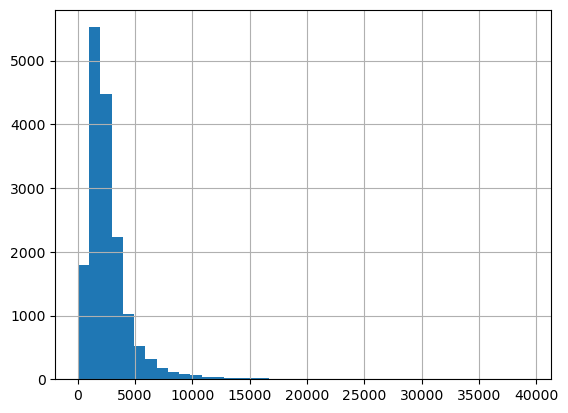

In [127]:
train_features_numeric["total_rooms"].hist(bins=40) #good for log 

<Axes: >

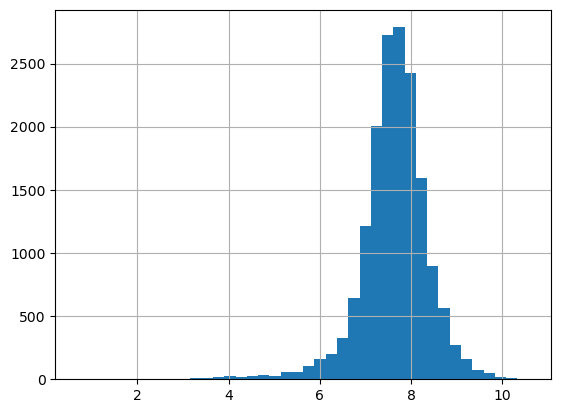

In [128]:
train_features_numeric["total_rooms"].apply(np.log).hist(bins=40)

<font color = '#0077b3'  size = '4'>**Other Transformations**<font><br>

__Handling Multimodal Features & the RBF Kernel__
> When your data has __multimodal distributions (multiple peaks)__, standard log transforms may not suffice. Here’s how to handle such cases, along with the role of the __RBF kernel__ in modeling complex distributions.

__1. Strategies for Multimodal Features__
>__1. Gaussian Mixture Models (GMM): Idea__: Model each mode as a separate Gaussian distribution. __Use Case__: Clustering or density estimation.<br>
>> `from sklearn.mixture import GaussianMixture.`
>
>__2. Quantile Transformation: Idea__: Map data to a uniform/normal distribution using percentiles. __Use Case__: Forces any distribution (including multimodal) to a target distribution.<br>
>>`from sklearn.preprocessing import QuantileTransformer.`

__RBF Kernel?__
>Radial Basis Function (RBF) is a similarity measure used in:
>>SVMs (SVC) for non-linear decision boundaries.
>>
>>Gaussian Processes for regression/classification.
>>
>>Kernel PCA for non-linear dimensionality reduction.
>>
__rbf kernel Maps data to an infinite-dimensional space where modes can be separated.__
#### RBF Kernel Formula

The Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, is defined as:
### $$ K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right) $$


In [131]:
from sklearn.metrics.pairwise import rbf_kernel

In [134]:
rbf_kernel(train_features_numeric[['housing_median_age']],[[35]],gamma = 0.1) #max of housing median age as xbar = 35, 

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

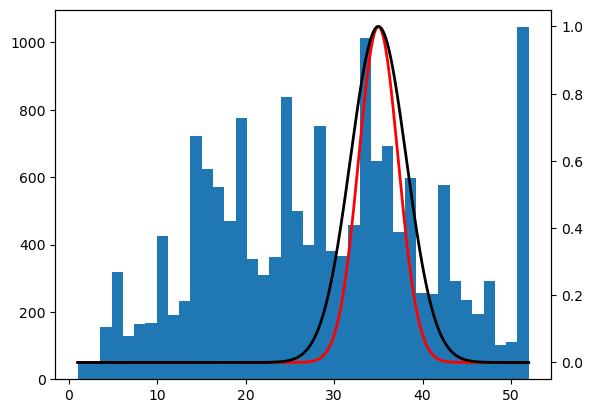

In [136]:
fig, ax = plt.subplots()
ax.hist(train_features_numeric['housing_median_age'], bins = 40)

a = train_features_numeric['housing_median_age'].min()
b = train_features_numeric['housing_median_age'].max()
housing_ages = np.linspace(a,b,1000).reshape(-1,1)

rbf1 = rbf_kernel(housing_ages, [[35]], gamma = 0.1)

ax2 =ax.twinx()
ax2.plot(housing_ages, rbf1, color = 'red', lw =2)

rbf2 = rbf_kernel(housing_ages, [[35]], gamma = 0.05) # کوچک → کرنل پهن‌تر (حساسیت کمتر) gamma
ax2.plot(housing_ages, rbf2, color = 'black', lw =2)

In [137]:
from sklearn.linear_model import LinearRegression

In [140]:
#i want to scale my target value and after modeling i have to inverse-transform my ((target feature))

ss = StandardScaler()
target_values = ss.fit_transform(train_target.to_frame())
target_values

array([[-0.41979429],
       [ 0.41090161],
       [ 0.02075259],
       ...,
       [ 1.28678181],
       [-1.0601948 ],
       [ 1.12429213]])

In [142]:
train_features_numeric[['median_income']]

,median_income
16415,3.1719
1279,4.4583
7741,2.7875
4425,1.6136
1283,2.2361
...,...
1221,2.1382
12640,2.1679
5747,5.5118
16224,3.4625


In [144]:
model = LinearRegression()
model.fit(train_features_numeric[['median_income']],target_values)   # fit in Linear regression needs to input, X and Y

LinearRegression()

In [146]:
predictions = model.predict(train_features_numeric[['median_income']].iloc[:5])  #with 5 amounts of features we want to predict target
#NOTE that we have inverse the scaled target

In [148]:
ss.inverse_transform(predictions)

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

### sklearn for inverse transform 

sklearn.compose.TransformedTargetRegressor __(regressor=None, *, transformer=None, func=None, inverse_func=None, check_inverse=True)__

In [151]:
from sklearn.compose import TransformedTargetRegressor #this code will transform and inverse transform all in one 

In [153]:
model = TransformedTargetRegressor(regressor = LinearRegression(), transformer = StandardScaler())

model.fit(train_features_numeric[['median_income']], train_target.to_frame())


TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [155]:
predictions = model.predict(train_features_numeric[['median_income']].iloc[:5])
predictions

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

<font color = '#0077b3'  size = '4'>**Function Transformations**<font><br>

__FunctionTransformer__ is a flexible tool in scikit-learn that lets you use any Python function as a data transformation step in your machine learning pipelines. It wraps your custom functions into a scikit-learn compatible transformer.

>__When to Use FunctionTransformer__
>
>✅ Custom feature engineering that isn't available in scikit-learn's built-in transformers
>
>✅ Quick prototyping of transformation ideas
>
>✅ Wrapping existing Python functions into your ML workflow
>
>✅ Creating reversible transformations (when you provide inverse_func)

###  sklearn.preprocessing.FunctionTransformer(func=None, inverse_func=None, *,validate=False, accept_sparse=False, check_inverse=True,feature_names_out=None, kw_args=None, inv_kw_args=None)

>__kw_args:__ dict, default=None, Dictionary of additional keyword arguments to pass to func
>
>⚠️ __Limitations:__ No learned parameters: Unlike other transformers, it doesn't learn anything from training data

In [158]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [160]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_transformer.transform(train_features_numeric[["population"]]) #if it was on target we have to inverse the transformer

,population
16415,5.545177
1279,6.874198
7741,7.372746
4425,5.517453
1283,4.615121
...,...
1221,7.201171
12640,6.784457
5747,6.715383
16224,7.465083


<font color = '#0077b3'  size = '4'>**custom Transformer**<font><br>

To build a custom transformer that can learn from data during fitting, you need to create a class that inherits from BaseEstimator and TransformerMixin. Here's a comprehensive guide:

In [163]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [165]:
class CustomStandardScaler(BaseEstimator, TransformerMixin): #inherting BaseEstimator, TransformerMixin
    def __init__(self, hp=0): #copy as a hyper parameter
        self.hp = hp
        
    def fit(self, X, y= None):  # always 3 input
        X = check_array(X)      #Proper input validation
        self.mean_of_X =X.mean(axis=0)       # Compute mean of each feature
        self.std_of_X =X.std(axis=0)         # Compute std dev of each feature
        # Handle zero std dev
        self.std_of_X = np.where(self.std_of_X == 0, 1, self.std_of_X)
        self.n_features_in =X.shape[1]       # Record number of features,  always set it in your class, X.shape[1] is number of columns (features
        self.is_fitted_ = True               # Explicit fitted flag
        return self
        
    def transform(self, X):
        check_is_fitted(self,'is_fitted_')    #Verifies that the estimator has been fitted
        assert self.n_features_in == X.shape[1]
        X = X- self.mean_of_X
        return X/ self.std_of_X

    def inverse_transform(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)
        return (X * self.std_of_X) + self.mean_of_X

In [167]:
css = CustomStandardScaler()

In [169]:
css.fit_transform(train_features_numeric)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-0.847903,1.060690,1.065006,-1.003811,-1.068653,-1.039117,-1.076980,-0.369087,-0.847609,-0.179382,-0.210670,-0.028453
1279,-1.037703,1.046606,-0.526863,-0.292922,-0.292301,-0.406831,-0.475183,0.309799,-1.037612,0.365122,-0.096095,-0.003756
7741,0.705462,-0.784282,0.507852,0.056499,0.399665,0.148977,0.304237,-0.571951,0.705322,-0.404841,0.617994,-0.043119
4425,0.660509,-0.727947,-0.128896,-1.115959,-1.099996,-1.045343,-1.106142,-1.191467,0.660385,-1.175258,2.181309,-0.002407
1283,-1.127609,1.126414,1.383380,-1.137740,-1.189204,-1.176958,-1.217487,-0.862948,-1.127521,-0.441398,0.457122,-0.049343
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-0.543224,1.248474,-0.606457,0.214989,0.349033,-0.074235,0.123963,-0.914614,-0.542430,0.112548,0.091179,-0.055669
12640,-0.942803,1.365838,0.428258,-0.342044,-0.292301,-0.480642,-0.276351,-0.898940,-0.942278,-0.270037,0.079071,-0.075676
5747,0.645525,-0.681001,1.542567,-0.496364,-0.617790,-0.533110,-0.610388,0.865775,0.645436,0.169649,-0.519760,0.000376
16224,-0.882866,1.107636,0.587445,0.223331,0.095875,0.285928,0.118661,-0.215726,-0.882557,0.136098,-0.436232,0.013463


<font color = '#0077b3'  size = '5'>**Pipeline**<font><br>

__A Pipeline in scikit-learn is a powerful tool that allows you to automatically chain multiple data preprocessing and modeling steps together in a streamlined workflow.__


When building machine learning models, you typically need to:

>1. Preprocess data (scaling, encoding, etc.)
>
>2. Apply dimensionality reduction (PCA, feature selection)
>
>3. Train a model

Issues with Manual Implementation:

>1. Data leakage if preprocessing is improperly applied
>
>2. Messy code from separate transformation steps
>
>3. Error-prone manual workflow management
>
__pipeline advantages__

>1. Pipelines chain preprocessing and modeling steps
>
>2. Prevent data leakage by proper train/test separation
>
>3. Enable easy hyperparameter tuning
>
>4. Make code more maintainable


In [172]:
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

#pipeline برای ویژگی های عددی

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline برای ویژگی‌های دسته‌ای

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ترکیب تبدیل‌گرها

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['age', 'income']),
    ('cat', categorical_transformer, ['gender', 'city'])
])

# Pipeline نهایی

final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

# آموزش Pipeline

final_pipe.fit(X_train, y_train)

# پیش‌بینی

y_pred = final_pipe.predict(X_test)
"""

"\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.ensemble import RandomForestClassifier\n\n#pipeline برای ویژگی های عددی\n\nnumeric_transformer = Pipeline([\n    ('imputer', SimpleImputer(strategy='median')),\n    ('scaler', StandardScaler())\n])\n\n# Pipeline برای ویژگی\u200cهای دسته\u200cای\n\ncategorical_transformer = Pipeline([\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\n# ترکیب تبدیل\u200cگرها\n\npreprocessor = ColumnTransformer([\n    ('num', numeric_transformer, ['age', 'income']),\n    ('cat', categorical_transformer, ['gender', 'city'])\n])\n\n# Pipeline نهایی\n\nfinal_pipe = Pipeline([\n    ('preprocessor', preprocessor),\n    ('classifier', RandomForestClassifier(n_estimators=100))\n])\n\n# آموزش Pipeline\n\nfinal_pipe.fit(X_train, y_train)\

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [176]:
numerical_features = list(train_features.columns)
numerical_features.remove('ocean_proximity')
categorical_features = ["ocean_proximity"]

In [178]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy = "median")),
    ("minmaxscaler" , MinMaxScaler())
])

categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy= "most_frequent")),
    ("ohe", OneHotEncoder())
])

In [180]:
# column transformer has 3 input: (name, pipeline, faetures name)

total_transformation = ColumnTransformer([
    ("numerical", numerical_features_pipeline, numerical_features),
    ("categorical", categorical_features_pipeline, categorical_features)
])

total_transformation.fit_transform(train_features)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.        , 0.        ,
        0.        ],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.        , 0.        ,
        0.        ],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.        , 0.        ,
        0.        ]])

In [182]:
total_transformation.get_feature_names_out()

array(['numerical__longitude', 'numerical__latitude',
       'numerical__housing_median_age', 'numerical__total_rooms',
       'numerical__total_bedrooms', 'numerical__population',
       'numerical__households', 'numerical__median_income',
       'numerical__identifier', 'numerical__rooms_per_house',
       'numerical__bedrooms_ratio', 'numerical__people_per_house',
       'categorical__ocean_proximity_<1H OCEAN',
       'categorical__ocean_proximity_INLAND',
       'categorical__ocean_proximity_ISLAND',
       'categorical__ocean_proximity_NEAR BAY',
       'categorical__ocean_proximity_NEAR OCEAN'], dtype=object)